<a href="https://colab.research.google.com/github/EllieMwangi/Medical-Expenditure-Analysis/blob/main/Medical_Expenditure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Expenditure Analysis

## Defining the analysis question

### Specifying the data analysis question

1. Estimate the rate/risk of large i.e > 20,000 USD, positive
expenditures among individuals.
2. Build a logistic regression model that estimates the risk of having
annual expenditure greater than $20,000 among persons with age between 40 and 96 years.
3. Identify social-economic, demographic and health indicators that are useful predictors of large positive expenditures among individuals



### Define metrics of success

ROC_AUC score and Recall will be metrics used in evaluating the performance of the model in predicting large postive expenditures.



### Recording Experimental Design
1. Define the research question
2. Data Importation
3. Data Exploration and Cleaning
4. Data Analysis
5. Data Preparation
6. Data Modeling
7. Model Evaluation


 ### Data Relevance

 The data for this project comes from 1987 NMES extract from Johns Hopkins Biostatistics Center. It is thus appropriate for answering the research question.

## Exploratory Data Analysis

## Data Importation

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import levene, ttest_ind, mannwhitneyu, kruskal
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.tools import tools
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_color_codes(palette='pastel')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import data
nmes_data = pd.read_csv('/content/drive/MyDrive/Nzuri Strategy/data/nmes.txt', sep = '\t', na_values='.')
glossary = pd.read_csv('/content/drive/MyDrive/Nzuri Strategy/data/nmes_glossary.csv')

In [ ]:
# Preview first 5 records
nmes_data.head()

,PIDX,LASTAGE,MALE,RACE3,eversmk,current,former,AGESMOKE,CIGSSMOK,CIGSADAY,AGESTOP,packyears,yearsince,INCALPER,TOTALEXP,lc5,chd5,beltuse,educate,marital,SREGION,POVSTALB
0,20843014,80,0,3,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,5805.555102,297.75,0,1,3.0,4,2.0,1,1.0
1,20833013,78,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7428.738855,451.57,0,0,3.0,3,2.0,1,4.0
2,20832010,80,1,3,1.0,1.0,0.0,21.0,10.0,10.0,NaN,30.0,0.0,8220.839822,1368.76,0,1,1.0,3,3.0,1,3.0
3,20829011,71,1,3,1.0,0.0,1.0,16.0,NaN,NaN,46.0,NaN,25.0,4857.094656,1205.32,0,0,3.0,3,1.0,1,5.0
4,20829024,69,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4808.212619,662.02,0,0,NaN,3,1.0,1,5.0


In [ ]:
# Preview last 5 records
nmes_data.tail()

,PIDX,LASTAGE,MALE,RACE3,eversmk,current,former,AGESMOKE,CIGSSMOK,CIGSADAY,AGESTOP,packyears,yearsince,INCALPER,TOTALEXP,lc5,chd5,beltuse,educate,marital,SREGION,POVSTALB
13643,31372016,55,0,3,1.0,1.0,0.0,18.0,40.0,40.0,NaN,76.0,0.0,9372.662007,115.00,0,0,2.0,2,3.0,4,4.0
13644,31370010,54,1,3,1.0,0.0,1.0,18.0,20.0,NaN,27.0,10.0,27.0,9909.577179,1350.95,0,0,1.0,3,1.0,4,5.0
13645,31370023,53,0,3,1.0,0.0,1.0,18.0,20.0,NaN,52.0,35.0,1.0,9951.748849,1303.90,0,0,2.0,3,1.0,4,5.0
13646,31368014,65,1,3,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,11508.257920,387.90,0,0,3.0,2,1.0,4,5.0
13647,31368027,56,0,3,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,12837.717840,309.00,0,0,3.0,3,1.0,4,5.0


In [ ]:
# Data glossary
glossary

,variable,description
0,PIDX,Subject ID
1,LASTAGE,Subject Age (40 – 94)
2,MALE,"1 – male, 0 – female"
3,RACE3,"1 – white, 2 – black, 3 – other"
4,eversmk,"1 – eversmoker, 0 – neversmoker"
5,current,"1 – current smoker, 0 – not current"
6,former,"1 – former smoker, 0 – not former"
7,AGESMOKE,reported age when started to smoke
8,CIGSSMOK,reported number of cigarettes smoked per day
9,CIGSADAY,reported number of cigarettes smoked per day


In [ ]:
# Check dataset shape
nmes_data.shape

(13648, 22)

In [ ]:
# Investigate data set info
nmes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PIDX       13648 non-null  int64  
 1   LASTAGE    13648 non-null  int64  
 2   MALE       13648 non-null  int64  
 3   RACE3      13648 non-null  int64  
 4   eversmk    11684 non-null  float64
 5   current    6437 non-null   float64
 6   former     11496 non-null  float64
 7   AGESMOKE   6241 non-null   float64
 8   CIGSSMOK   5704 non-null   float64
 9   CIGSADAY   2814 non-null   float64
 10  AGESTOP    3140 non-null   float64
 11  packyears  10861 non-null  float64
 12  yearsince  11186 non-null  float64
 13  INCALPER   13648 non-null  float64
 14  TOTALEXP   13648 non-null  float64
 15  lc5        13648 non-null  int64  
 16  chd5       13648 non-null  int64  
 17  beltuse    12405 non-null  float64
 18  educate    13648 non-null  int64  
 19  marital    13328 non-null  float64
 20  SREGIO

## Data Analysis

In [ ]:
# Check for missing values
nmes_data.isnull().sum().sort_values(ascending=False)/nmes_data.shape[0] * 100

CIGSADAY     79.381594
AGESTOP      76.992966
CIGSSMOK     58.206331
AGESMOKE     54.271688
current      52.835580
packyears    20.420574
yearsince    18.039273
former       15.767878
eversmk      14.390387
beltuse       9.107562
marital       2.344666
POVSTALB      0.410317
LASTAGE       0.000000
INCALPER      0.000000
TOTALEXP      0.000000
lc5           0.000000
chd5          0.000000
RACE3         0.000000
educate       0.000000
MALE          0.000000
SREGION       0.000000
PIDX          0.000000
dtype: float64

Variables CIGSADAY, AGESTOP, CIGSMOK, AGESMOK and current have more than 50% rows with missing values. Dropping them would be reasonable

In [ ]:
# Drop columns with large number of missing values
nmes_data = nmes_data.drop(columns=['AGESMOKE', 'CIGSSMOK', 'CIGSADAY', 'AGESTOP', 'current'])

In [ ]:
# Check number of unique values per column
for col in nmes_data.columns:
  print(f"{col}: Count of unique values:{nmes_data[col].nunique()}")

PIDX: Count of unique values:13648
LASTAGE: Count of unique values:55
MALE: Count of unique values:2
RACE3: Count of unique values:3
eversmk: Count of unique values:2
former: Count of unique values:2
packyears: Count of unique values:564
yearsince: Count of unique values:73
INCALPER: Count of unique values:10915
TOTALEXP: Count of unique values:10196
lc5: Count of unique values:2
chd5: Count of unique values:2
beltuse: Count of unique values:3
educate: Count of unique values:4
marital: Count of unique values:5
SREGION: Count of unique values:4
POVSTALB: Count of unique values:5


*   No duplicate records due to 13648 unique identifiers
*   Only 5 variables are numeric i.e LASTAGE, packyears, yearsince, INCALPER, TOTALEXP


### Univariate Analysis

In [ ]:
numeric_variables = ['LASTAGE', 'packyears', 'yearsince', 'INCALPER', 'TOTALEXP']
nmes_data[numeric_variables].describe()

,LASTAGE,packyears,yearsince,INCALPER,TOTALEXP
count,13648.000000,10861.000000,11186.000000,13648.000000,13648.000000
mean,60.653502,17.941000,4.737797,6520.868624,2956.329748
std,13.198304,25.823126,10.374102,3274.185570,8393.412429
min,40.000000,0.000000,0.000000,780.924047,0.000000
25%,49.000000,0.000000,0.000000,4061.730219,161.000000
50%,61.000000,2.800000,0.000000,5451.788234,600.000000
75%,71.000000,30.000000,2.000000,9152.403095,1878.795000
max,94.000000,216.000000,83.000000,26912.163450,175095.970000


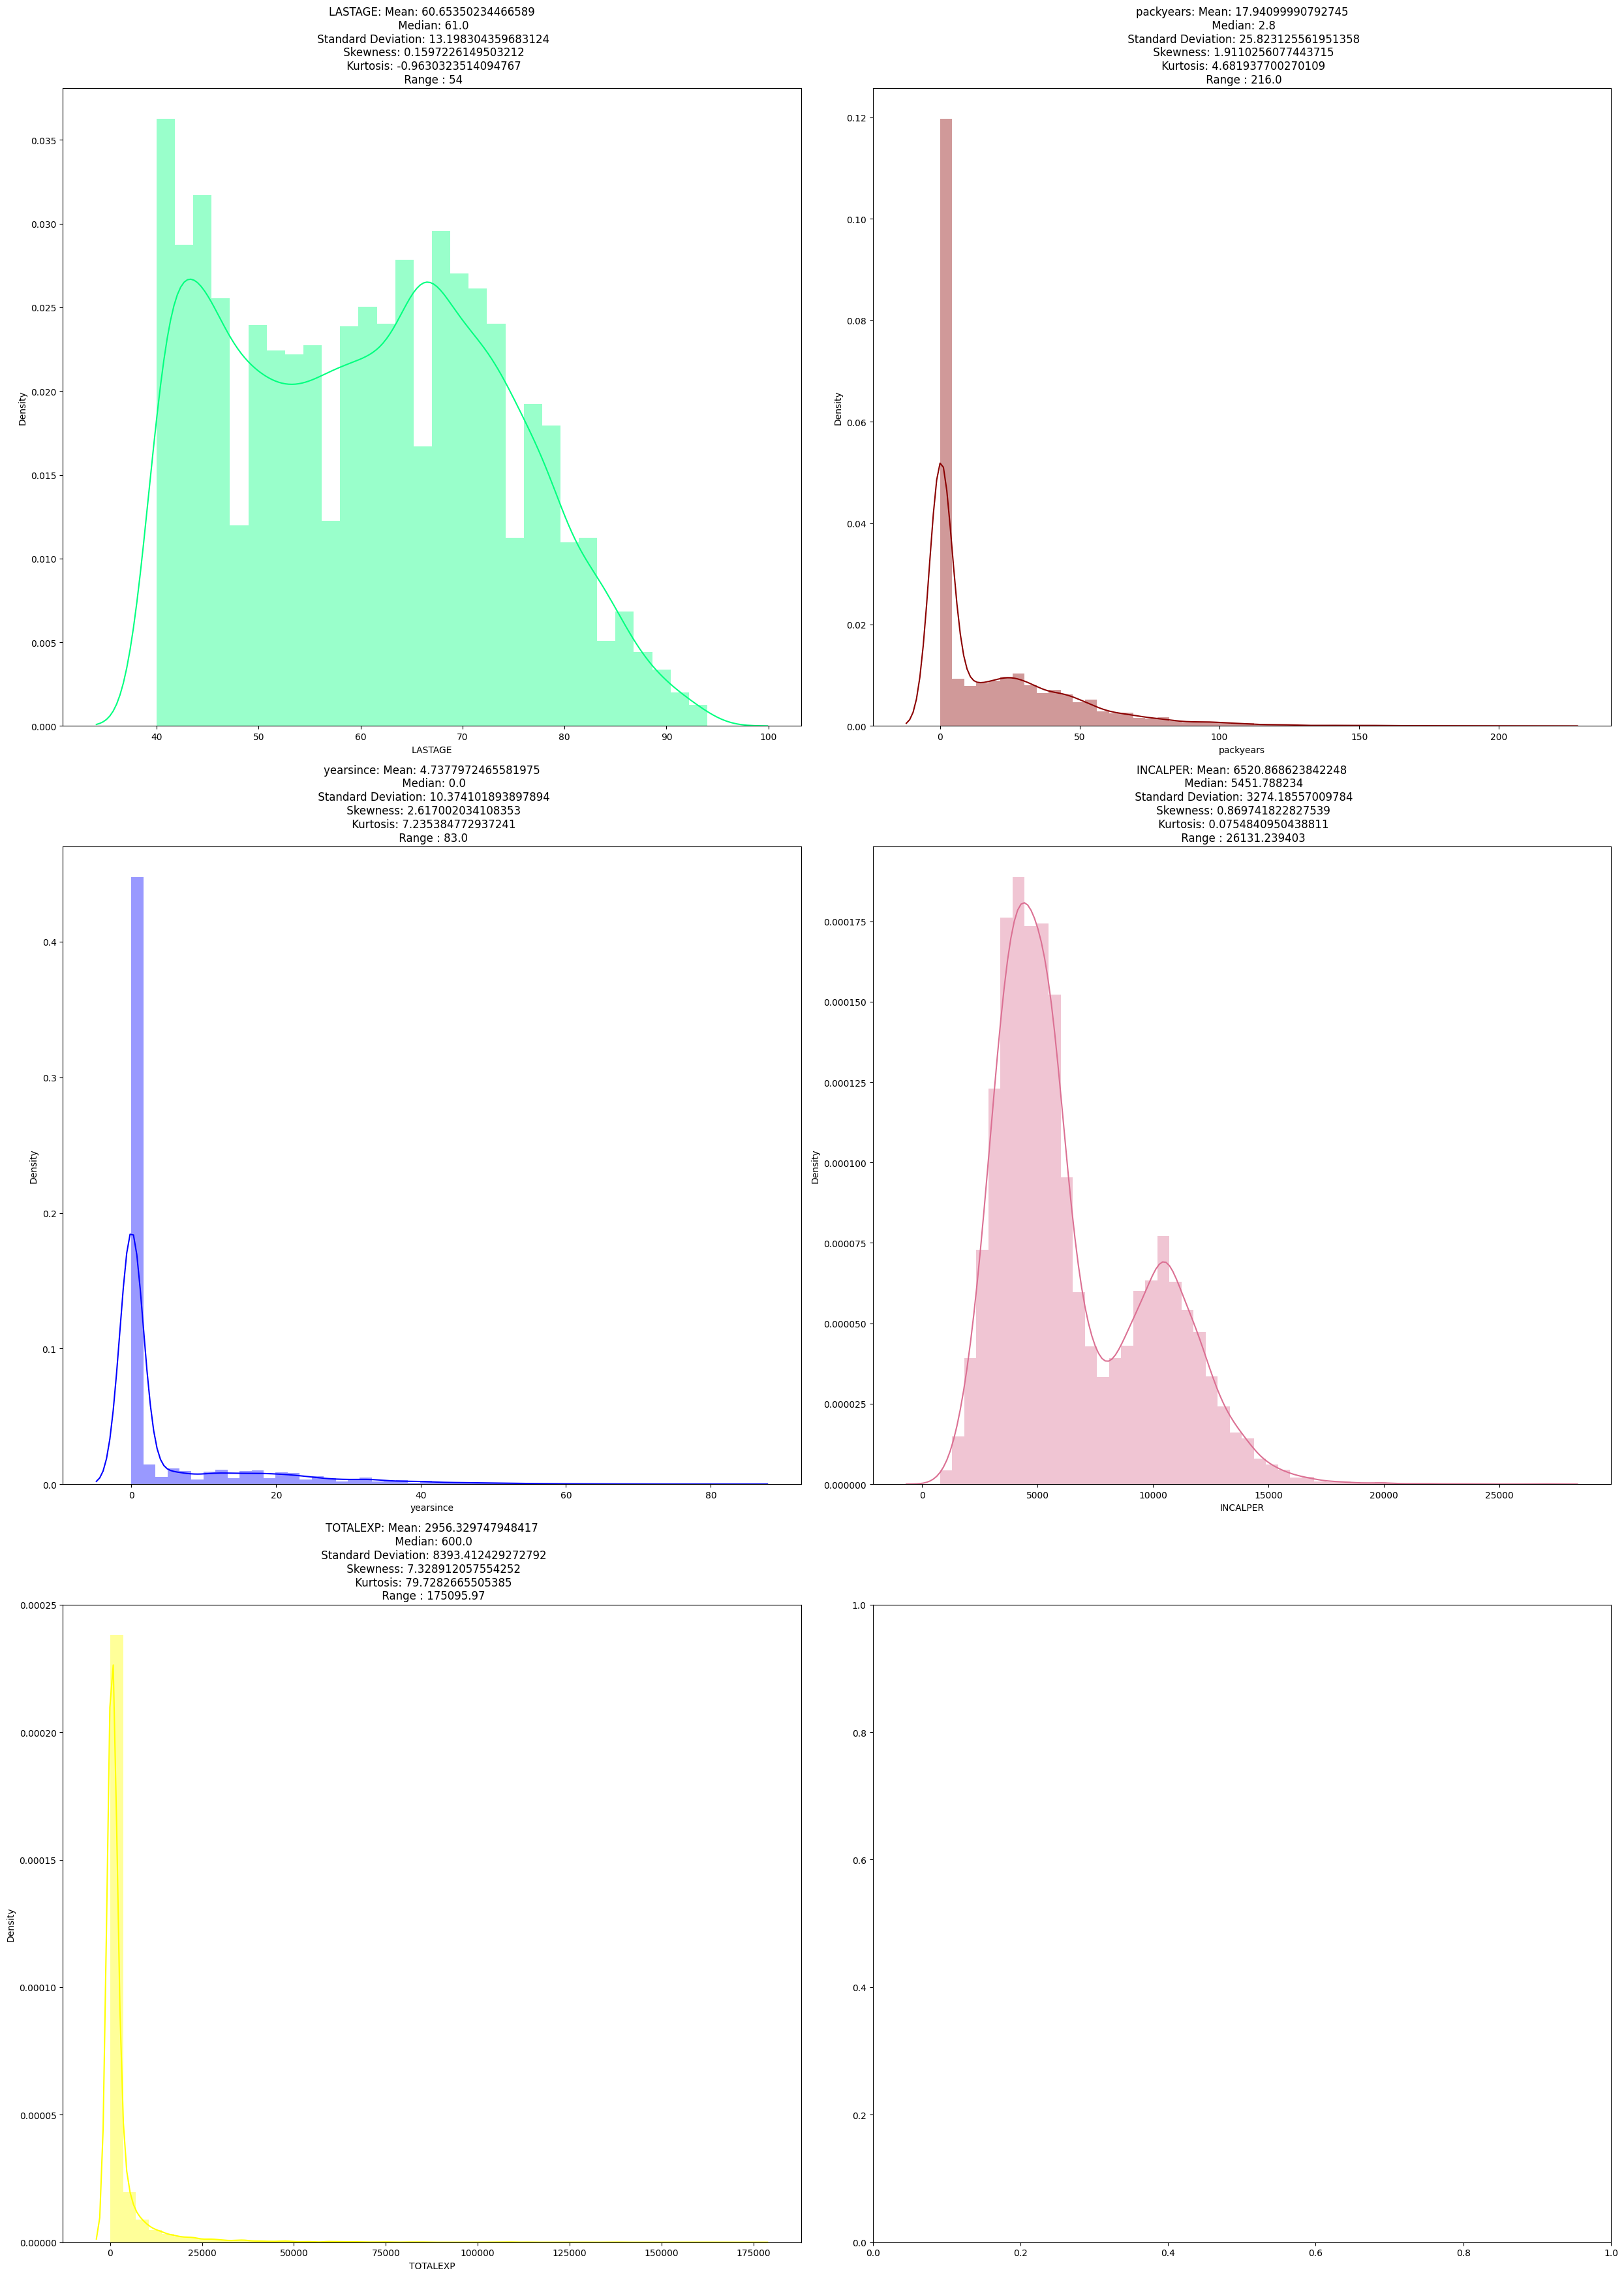

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 35))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00']

for col, colour, ax in zip(numeric_variables, colors, axes.flatten()):

  mean = nmes_data[col].mean()
  median = nmes_data[col].median()
  standard_var = nmes_data[col].std()
  skew = nmes_data[col].skew()
  kurt = nmes_data[col].kurt()
  range = nmes_data[col].max() - nmes_data[col].min()

  sns.distplot(nmes_data[col], hist=True, ax=ax, color=colour)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()


*   LASTAGE variable is normally distributed with mean and mode being close to each other and a skewness between -0.5 and 0.5
*   packyears, yearsince and TOTALEXP are heavily positively skewed (skew > 1) and leptokurtic (have a kurtosis > 3)
*   INCALPER is moderately positively skewed (skew between 0.5 and 1)
* TOTALEXP being the target variable has a considerable large range of 175095, with the minimum expenditure being 0 and the maximum being 175095.97

<Axes: xlabel='TOTALEXP', ylabel='Density'>

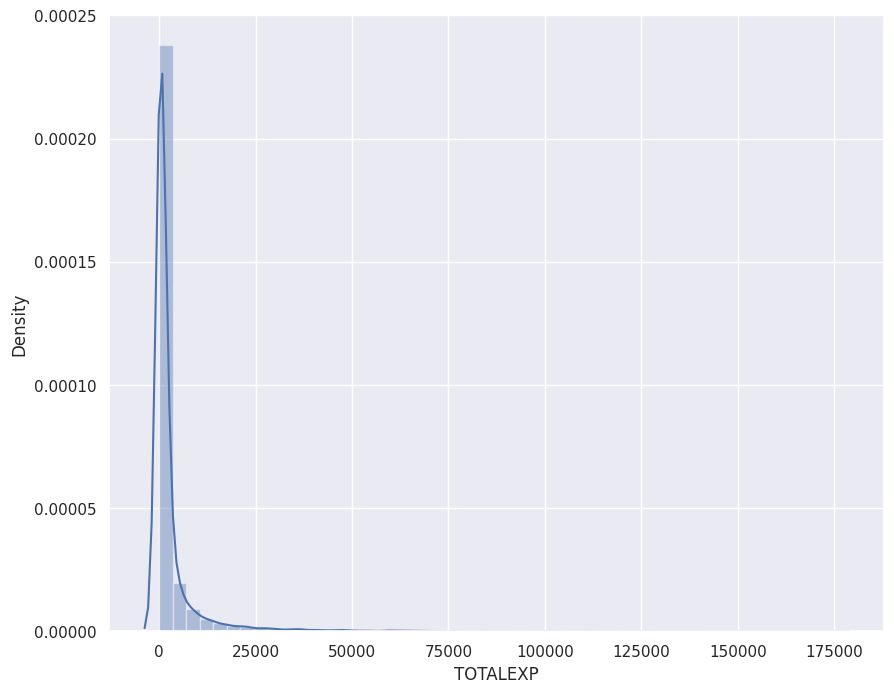

In [ ]:
# Plot histogram of distribution of total expenditures
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(nmes_data['TOTALEXP'], kde=True, bins=50)

<Axes: xlabel='TOTALEXP'>

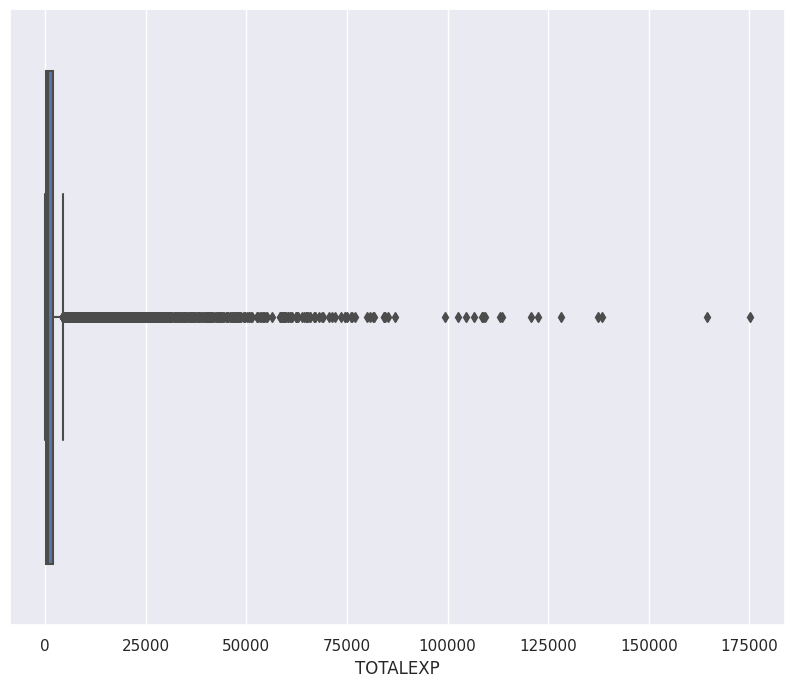

In [ ]:
sns.boxplot(x = nmes_data['TOTALEXP'])

With a mean of 2956, a median of 600 and a 75% of 1878 the total expenditure variable is positively skewed with majority of rows having an expenditure value below 2000

In [ ]:
# Check distribution of each categorical variable
categorical_variables = list(set(nmes_data.drop(columns=['PIDX']).columns).difference(numeric_variables))

for col in categorical_variables:
  print(nmes_data[col].value_counts(normalize=True)*100)

1.0    64.885954
2.0    18.472389
3.0     9.026110
5.0     4.966987
4.0     2.648559
Name: marital, dtype: float64
3.0    57.025393
1.0    23.184200
2.0    19.790407
Name: beltuse, dtype: float64
5.0    37.470571
4.0    30.885815
3.0    14.913184
1.0    11.381695
2.0     5.348735
Name: POVSTALB, dtype: float64
0    56.858148
1    43.141852
Name: MALE, dtype: float64
0    90.276964
1     9.723036
Name: chd5, dtype: float64
3    76.216295
2    17.006155
1     6.777550
Name: RACE3, dtype: float64
3    37.228898
2    24.443142
1    20.134818
4    18.193142
Name: SREGION, dtype: float64
3    49.128077
4    23.607855
2    13.870164
1    13.393904
Name: educate, dtype: float64
0.0    69.989562
1.0    30.010438
Name: former, dtype: float64
0    97.948417
1     2.051583
Name: lc5, dtype: float64
1.0    56.701472
0.0    43.298528
Name: eversmk, dtype: float64


Variables lc5, former, marital, RACE3, chd5 and beltuse have significant class imbalances.

### Bivariate Analysis

<Axes: >

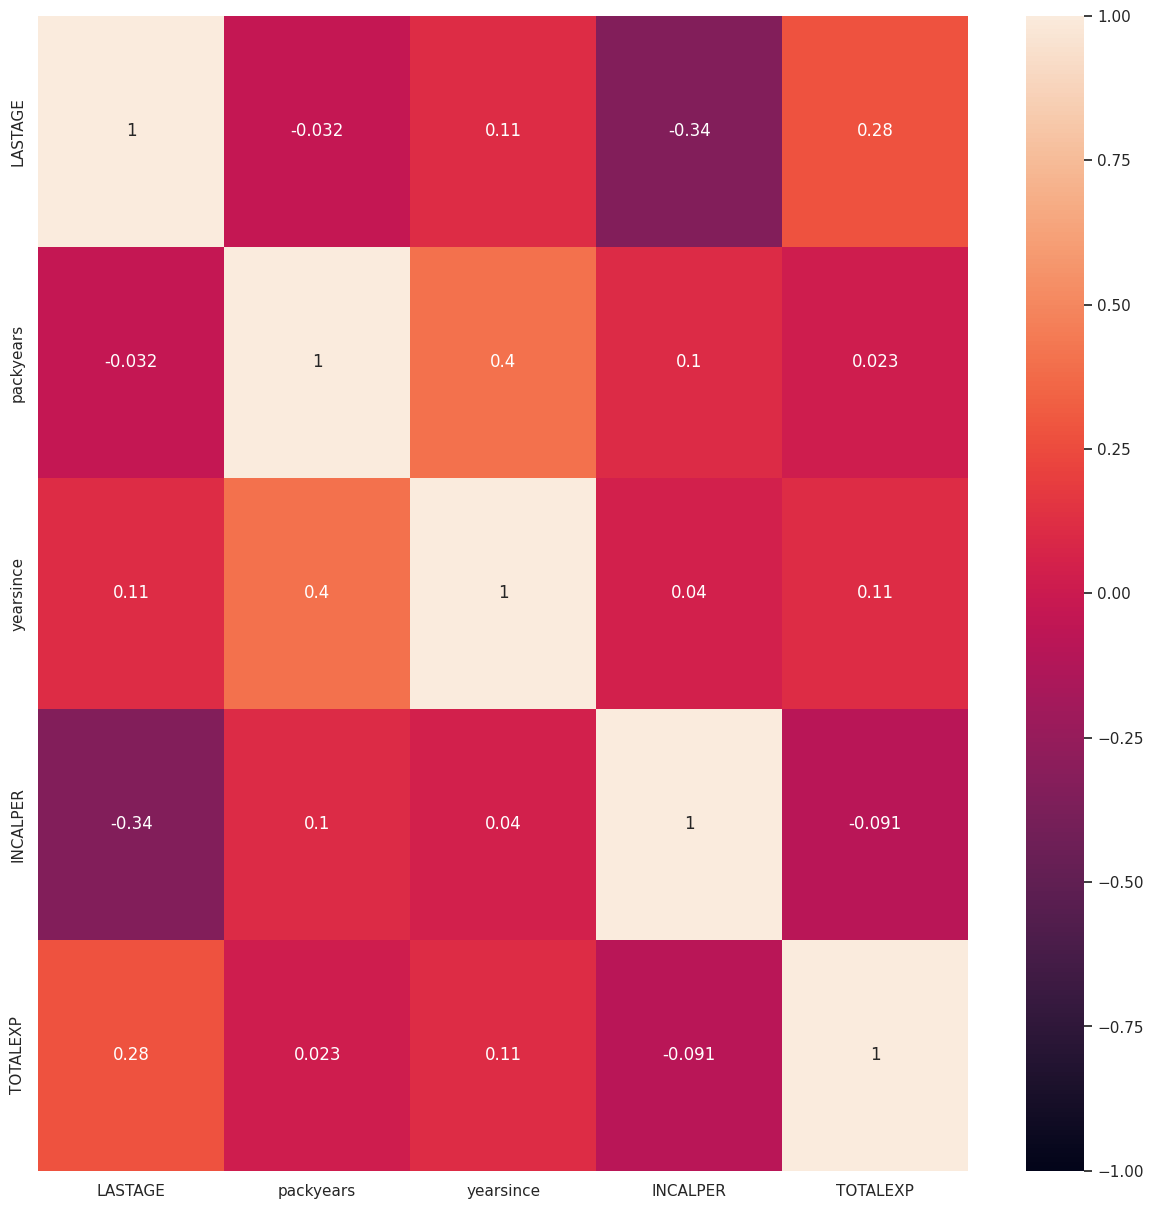

In [ ]:
# Check correlation between numeric variables using spearman correlation (does not require normal distribution)
spearman_corr = nmes_data[numeric_variables].corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr, vmin=-1, vmax=1, annot=True)

Weak correlation between two variables:
*   LASTAGE and TOTALEXP - 0.28
*   packyears and yearsince - 0.4



<Axes: >

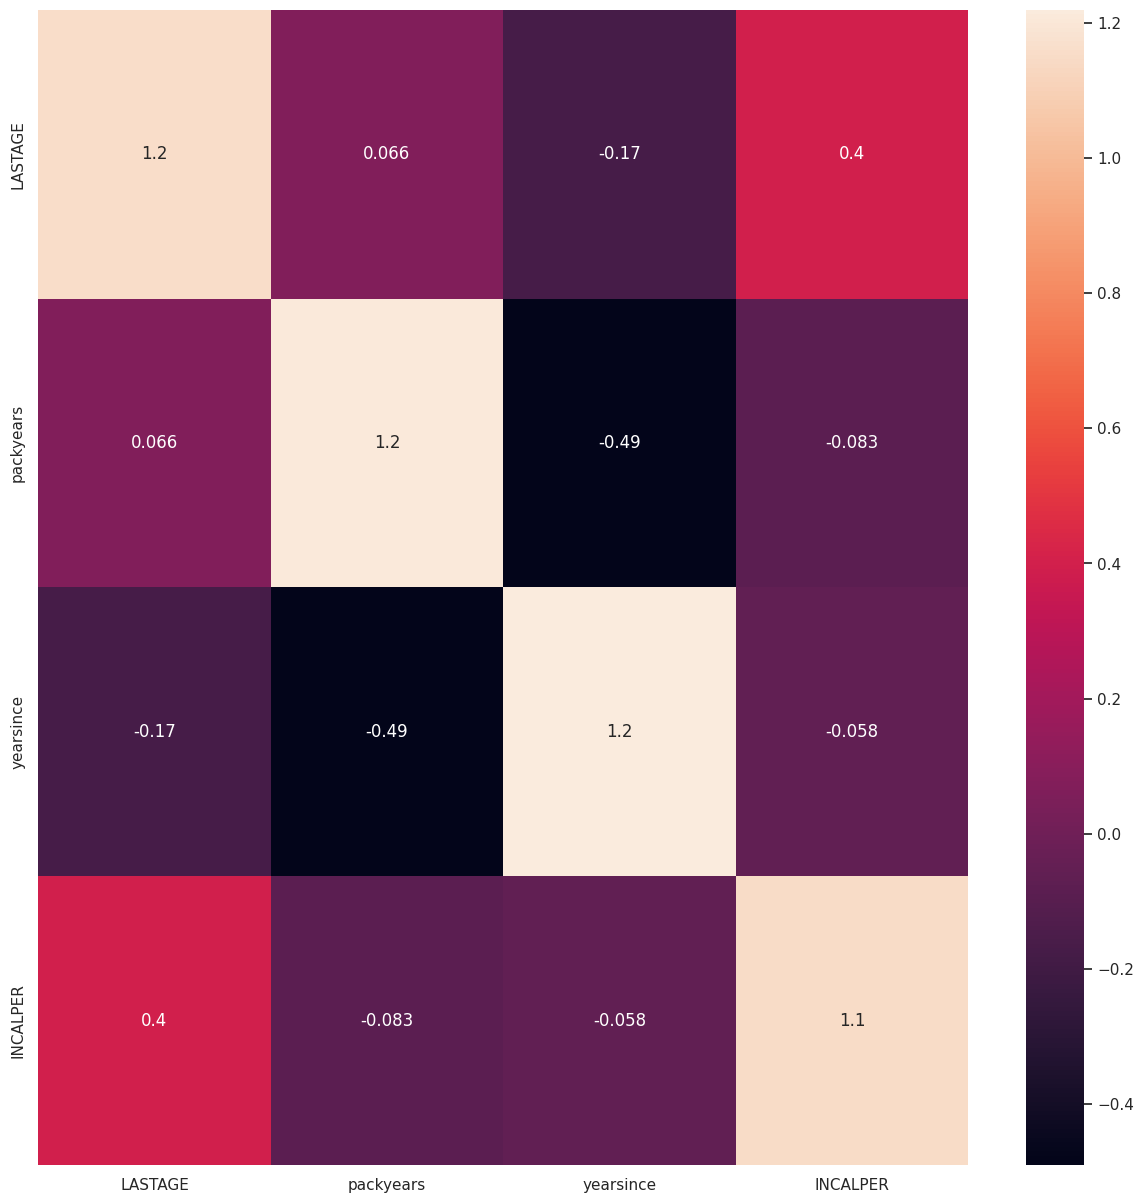

In [ ]:
# Test for multicollinearity
spearman_corr.drop(['TOTALEXP'], axis=1, inplace=True)
spearman_corr.drop(['TOTALEXP'], axis=0, inplace=True)
vif = pd.DataFrame(np.linalg.inv(spearman_corr), index = spearman_corr.index, columns=spearman_corr.columns)

plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)

No multicollinearity among variables

### Hypothesis Testing

In [ ]:
## Investigate relationship between categorical variables and the dependent variable
hypothesis_df = nmes_data[['eversmk','chd5','MALE','beltuse','POVSTALB','RACE3','marital','SREGION','former','lc5','educate','TOTALEXP']].dropna()

In [ ]:
# Separate biclass and multiclass categorical variables
biclass_variables = ['eversmk','chd5','MALE','former','lc5']
multiclass_variables = ['beltuse','POVSTALB','RACE3','marital','SREGION', 'educate']

In [ ]:
for col in biclass_variables:
  print(f"Investigating relationship between {col} and TOTALEXP:\n")
  print(f"H0: {col} has no influence on TOTALEXP")
  print(f"H1: {col} has an influence on TOTALEXP\n")
  print(f"Perform levene test to check that variances between two groups is equal:")

  group_1 = hypothesis_df[hypothesis_df[col] == 1]['TOTALEXP'].values
  group_2 = hypothesis_df[hypothesis_df[col] == 0]['TOTALEXP'].values

  statistic, p_value = levene(group_1, group_2)
  print(f"Levene test statistic:{statistic}, p-value:{p_value}\n")

  print(f"Perform indepent samples t-test for {col}:")
  t_statistic, p_value = ttest_ind(group_1, group_2, equal_var=False)
  print(f"t-statistic:{t_statistic}, p-value:{p_value}\n")

  print(f"Perform mann-whitney u test for {col}:")
  u_statistic, p_value = mannwhitneyu(group_1, group_2)
  print(f"u-statistic:{u_statistic}, p-value:{p_value}")

  print('...........................................\n')




Investigating relationship between eversmk and TOTALEXP:

H0: eversmk has no influence on TOTALEXP
H1: eversmk has an influence on TOTALEXP

Perform levene test to check that variances between two groups is equal:
Levene test statistic:2.5367337994591757, p-value:0.11125238033316386

Perform indepent samples t-test for eversmk:
t-statistic:1.5446647730362053, p-value:0.12245633768837338

Perform mann-whitney u test for eversmk:
u-statistic:16144109.0, p-value:0.47074718001295357
...........................................

Investigating relationship between chd5 and TOTALEXP:

H0: chd5 has no influence on TOTALEXP
H1: chd5 has an influence on TOTALEXP

Perform levene test to check that variances between two groups is equal:
Levene test statistic:461.31290610712296, p-value:2.391574042524414e-100

Perform indepent samples t-test for chd5:
t-statistic:13.09607151074121, p-value:1.6660829996354037e-36

Perform mann-whitney u test for chd5:
u-statistic:8503354.5, p-value:2.6143469382391818

The p-value for lc5, former, MALE and chd5 is less than the significance level of 0.05 thus we can reject the null hypothesis.





In [ ]:
for col in multiclass_variables:
  print(f"Investigating relationship between {col} and TOTALEXP:\n")
  print(f"H0: {col} has no influence on TOTALEXP")
  print(f"H1: {col} has an influence on TOTALEXP\n")

  category_groups = [hypothesis_df[hypothesis_df[col] == category]['TOTALEXP'] for category in hypothesis_df[col].unique()]
  h_statistic, p_value = kruskal(*category_groups)

  print(f"h-statistic:{h_statistic}, p-value:{p_value}")

  print('...........................................\n')


Investigating relationship between beltuse and TOTALEXP:

H0: beltuse has no influence on TOTALEXP
H1: beltuse has an influence on TOTALEXP

h-statistic:52.7389795641558, p-value:3.530824220264897e-12
...........................................

Investigating relationship between POVSTALB and TOTALEXP:

H0: POVSTALB has no influence on TOTALEXP
H1: POVSTALB has an influence on TOTALEXP

h-statistic:16.33885885339685, p-value:0.0025965948533832506
...........................................

Investigating relationship between RACE3 and TOTALEXP:

H0: RACE3 has no influence on TOTALEXP
H1: RACE3 has an influence on TOTALEXP

h-statistic:111.89617564673087, p-value:5.0356343256657905e-25
...........................................

Investigating relationship between marital and TOTALEXP:

H0: marital has no influence on TOTALEXP
H1: marital has an influence on TOTALEXP

h-statistic:102.06554096420689, p-value:3.5729450240902786e-21
...........................................

Investigatin

The p-value of all multiclass variables is less than a significance level of 0.05 thus the null hypothesis is rejected.

## Data Preparation

In [ ]:
# Impute missing values in numeric variables: packyears and yearsince using median
for col in ['packyears','yearsince']:
  nmes_data[col].fillna(nmes_data[col].median(), inplace = True)

# Impute missing values in categorical variables using mode
for col in ['former', 'eversmk','beltuse','marital','POVSTALB']:
  nmes_data[col].fillna(nmes_data[col].mode()[0], inplace = True)

In [ ]:
# Extract X and y variables
X = nmes_data.drop(['TOTALEXP','PIDX'], axis=1)
y = nmes_data['TOTALEXP']

In [ ]:
# Convert y variable into a categorical variable: y greater than 20000 (1), y lesser than 20000 (0)
y = np.where(y > 20000, 1, 0)

In [ ]:
# Check for class imbalance in target variable : Class imbalance with 1 class only accounting for 3% of dataset
pd.Series(y).value_counts(normalize = True)

0    0.967541
1    0.032459
dtype: float64

In [ ]:
# Split data into train and test sets. Stratify y to handle class imbalance
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Add a constant term for the intercept
X_train_stats = sm.add_constant(X_train)
# Fit Logit model with training data
logit_model = sm.Logit(y_train, X_train_stats)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.126720
         Iterations 8


## Model Evaluation

### Evaluate model coefficients

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 9553
Model:                          Logit   Df Residuals:                     9537
Method:                           MLE   Df Model:                           15
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1148
Time:                        07:59:58   Log-Likelihood:                -1210.6
converged:                       True   LL-Null:                       -1367.6
Covariance Type:            nonrobust   LLR p-value:                 6.527e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4183      0.645     -8.401      0.000      -6.682      -4.154
LASTAGE        0.0310      0.006      5.316      0.000       0.020       0.042
MALE           0.1219      0.129      0.946      0.3

Variables that are very significant in predicting the target variable are based on the p_value:
* LASTAGE
* lc5
* chd5

In [ ]:
# Add constant term to x_test and make predictions
X_test_stats = sm.add_constant(X_test)
y_pred_probabilities_stats = result.predict(X_test_stats)

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,list(map(round,y_pred_probabilities_stats)))}')
print(f'Recall Score: {recall_score(y_test,list(map(round,y_pred_probabilities_stats)))}')
print(f'Area Under Curve: {roc_auc_score(y_test, list(map(round,y_pred_probabilities_stats)))}')
print(f'Classification Report: \n {classification_report(y_test,list(map(round,y_pred_probabilities_stats)))}')
print(f'Confusion matrix: \n {confusion_matrix(y_test,list(map(round,y_pred_probabilities_stats)))}')

Accuracy Score: 0.9675213675213675
Recall Score: 0.0
Area Under Curve: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3962
           1       0.00      0.00      0.00       133

    accuracy                           0.97      4095
   macro avg       0.48      0.50      0.49      4095
weighted avg       0.94      0.97      0.95      4095

Confusion matrix: 
 [[3962    0]
 [ 133    0]]


In [ ]:
# Recall of 0 in the 1 class indicates that the model is unable to identify 1 class to due class imbalance
logreg = LogisticRegression(random_state=42, class_weight={0:3,1:96}).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_probabilities = logreg.predict_proba(X_test)[:, 1]

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test,y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test,y_pred)}')

Accuracy Score: 0.6395604395604395
Recall Score: 0.7142857142857143
Area Under Curve: 0.6756688541140838
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.64      0.77      3962
           1       0.06      0.71      0.11       133

    accuracy                           0.64      4095
   macro avg       0.52      0.68      0.44      4095
weighted avg       0.96      0.64      0.75      4095

Confusion matrix: 
 [[2524 1438]
 [  38   95]]


In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
roc_auc = auc(fpr, tpr)

print("Area under the ROC Curve:", roc_auc)

Area under the ROC Curve: 0.7443988568088571


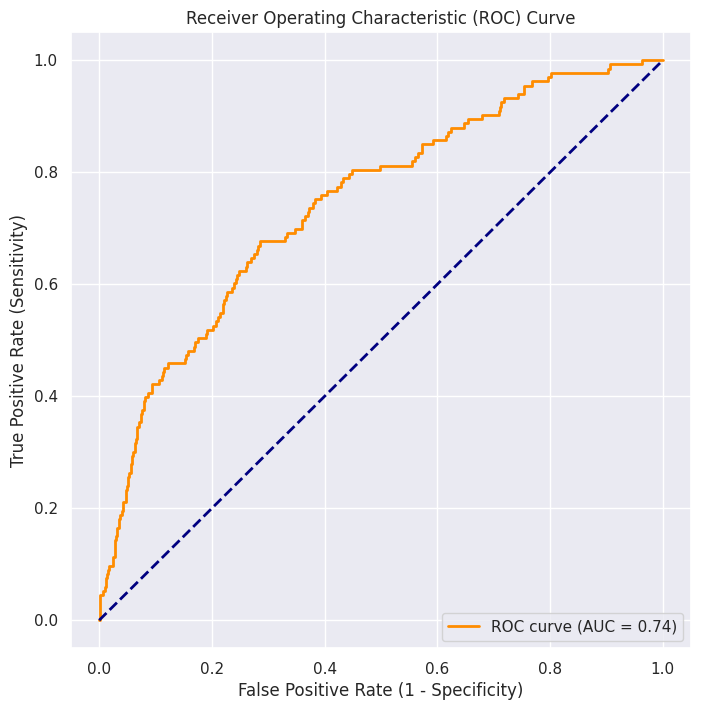

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter Tuning

In [ ]:
w = [{0:3, 1:96},{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0},
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0},
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0},
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100},
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0},
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1},
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005},
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150},
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500},
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [ ]:
# logistic model classifier
logreg_tuner = LogisticRegression(random_state=13)
# define evaluation procedure
random_search = RandomizedSearchCV(logreg_tuner,hyperparam_grid,scoring="roc_auc", cv=10, n_jobs=-1, refit=True)
random_search.fit(X,y)
print(f'Best score: {random_search.best_score_} with param: {random_search.best_params_}')

Best score: 0.7145178695228848 with param: {'penalty': 'l2', 'fit_intercept': True, 'class_weight': {0: 1.0, 1: 100}, 'C': 1.0}


Slight drop in model performance of the roc_auc score from 0.74 to 0.71

### Cross Validation

In [ ]:
logistic_model = LogisticRegression(random_state=42, class_weight={0:3,1:96})

cv_scores_all_features = cross_val_score(logistic_model, X, y, cv=5, scoring='roc_auc')
print("AUC with Cross-Validation (All Features):", np.mean(cv_scores_all_features))

# Model with lc5, chd5, age, and gender only
X_subset = nmes_data[['lc5', 'chd5', 'LASTAGE', 'MALE']]
cv_scores_subset = cross_val_score(logistic_model, X_subset, y, cv=5, scoring='roc_auc')
print("AUC with Cross-Validation (Subset of Features):", np.mean(cv_scores_subset))

AUC with Cross-Validation (All Features): 0.7199301770346531
AUC with Cross-Validation (Subset of Features): 0.7597114953593815


### Calibration Curve

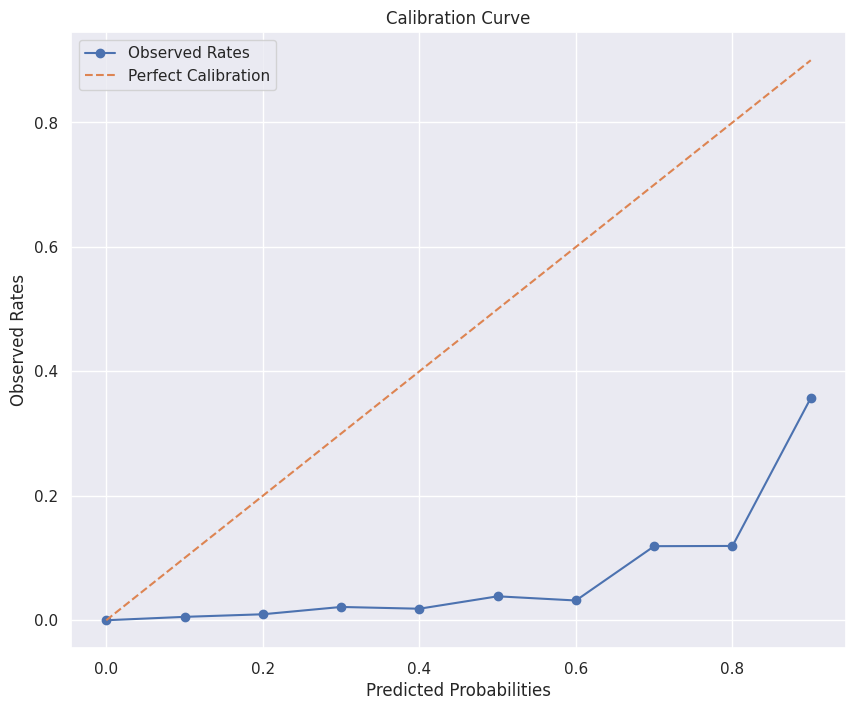

In [ ]:
# Create bins and calculate observed rates within each bin
bins = np.linspace(0, 1, 11)
bin_labels = pd.cut(y_pred_probabilities, bins)
observed_rates = pd.Series(y_test).groupby(bin_labels).mean()

plt.plot(bins[:-1], observed_rates, marker='o', label='Observed Rates')
plt.plot(bins[:-1], bins[:-1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Observed Rates')
plt.title('Calibration Curve')
plt.legend()
plt.show()


Calibration curve does not align with the perfect
calibration line and is below it indicating that the model is overestimating all it's predictions

### Cooks distance and leverage

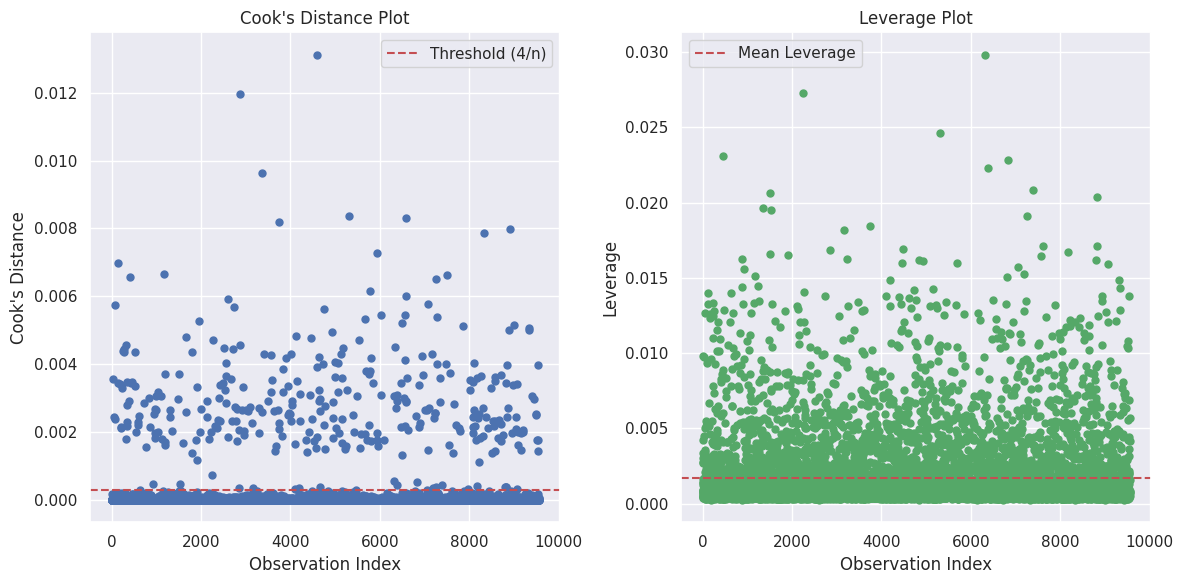

In [ ]:
# Calculate Cook's distance and leverage
influence = result.get_influence()
cook_distance = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

# Plot Cook's distance against observation indices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cook_distance, 'bo', markersize=5)
plt.axhline(y=4/len(y), color='r', linestyle='--', label='Threshold (4/n)')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()

# Plot leverage against observation indices
plt.subplot(1, 2, 2)
plt.plot(leverage, 'go', markersize=5)
plt.axhline(y=np.mean(leverage), color='r', linestyle='--', label='Mean Leverage')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.title('Leverage Plot')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Identify influential points based on Cook's distance or leverage thresholds
threshold_cooks = 4/len(y)
influential_points_cooks = np.where(cook_distance > threshold_cooks)[0]

threshold_leverage = np.mean(leverage)
influential_points_leverage = np.where(leverage > threshold_leverage)[0]

print(f"Influential observations with leverage threshold: {nmes_data.iloc[influential_points_leverage].shape}")
print(f"Influential observations with cooks distance: {nmes_data.iloc[influential_points_cooks].shape}")


Influential observations with leverage threshold: (2248, 17)
Influential observations with cooks distance: (332, 17)
